[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sunyeul/playground/blob/main/Statistics_with_code/Population_variance_estimation.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

In [3]:
mu, sigma = 0, 1
population_size = 10000
sample_size = 5
n_iterations = 10000

In [4]:
lst = []
for _ in range(n_iterations):
    sample = np.random.normal(mu, sigma, size=sample_size)
    mean = np.mean(sample)
    chi = np.sum(np.power(sample-mean,2)) / (sigma ** 2)
    lst.append(chi)
lst = np.array(lst)

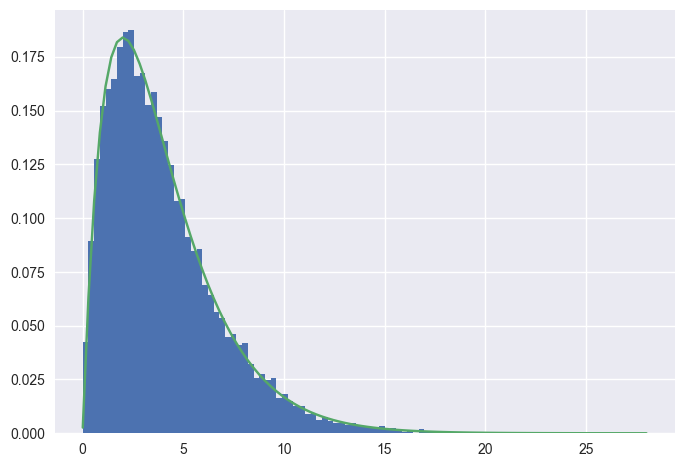

In [5]:
bins = np.linspace(min(lst), max(lst), 100)

plt.hist(lst, bins=bins, density=True)
plt.plot(bins, chi2.pdf(bins, sample_size - 1))

plt.show()

In [6]:
np.random.normal()

1.0052112851616903

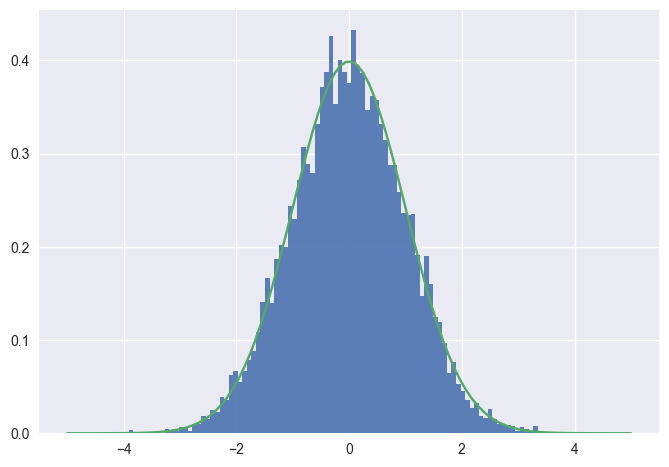

In [7]:
population = np.random.normal(mu, sigma, size=population_size)
pop_var = np.var(population)
pop_mean = np.mean(population)
pop_bins = np.linspace(-5, 5, 100)

plt.hist(population, bins=100, density=True, alpha=.9)
plt.plot(pop_bins, norm.pdf(pop_bins))
plt.show()

In [8]:
lst = []
for _ in range(n_iterations):
    sample = np.random.choice(population, size=sample_size)
    sample_mean = np.mean(sample)
    chi = np.sum(np.power(sample - sample_mean,2)) / (pop_var ** 2)
    lst.append(chi)
lst = np.array(lst)

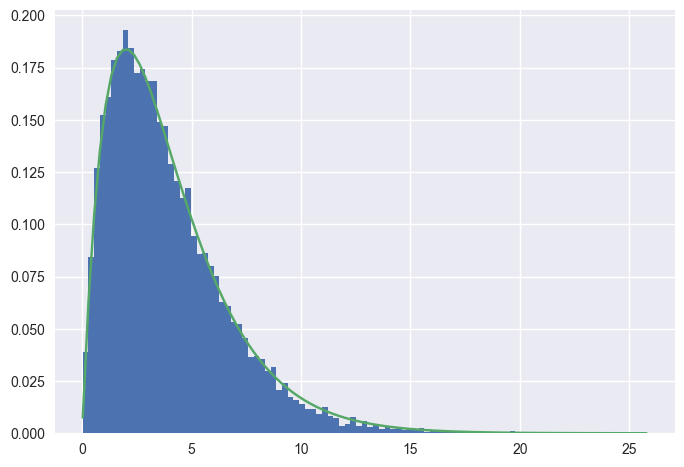

In [9]:
bins = np.linspace(min(lst), max(lst), 100)

plt.hist(lst, bins=bins, density=True)
plt.plot(bins, chi2.pdf(bins, sample_size - 1))

plt.show()

In [10]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [11]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
from typing import List

def skewness(X:List[int]):
    n = len(X)
    mean = sum(X) / n
    numerator = 0
    denominator = 0
    for x in X:
        denominator += (x - mean) ** 2 / n
        numerator += (x - mean) ** 3 / n
    denominator = denominator ** (3/2)
    return numerator / denominator

def kurtosis(X:List[int]):
    n = len(X)
    mean = sum(X) / n
    numerator = 0
    denominator = 0
    for x in X:
        denominator += (x - mean) ** 2 / n
        numerator += (x - mean) ** 4 / n
    denominator = denominator ** 4
    return numerator / denominator

<function matplotlib.pyplot.show(*args, **kw)>

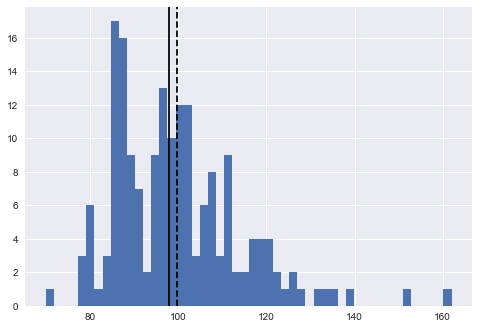

In [173]:
plt.hist(X["magnesium"], bins= 50)

plt.axvline(X["magnesium"].median(), color="k")
plt.axvline(X["magnesium"].mean(), color='k', linestyle='--')

plt.show

In [13]:
X.apply(skewness, axis=0)

alcohol                        -0.051047
malic_acid                      1.030869
ash                            -0.175207
alcalinity_of_ash               0.211247
magnesium                       1.088915
total_phenols                   0.085907
flavanoids                      0.025129
nonflavanoid_phenols            0.446349
proanthocyanins                 0.512769
color_intensity                 0.861248
hue                             0.020913
od280/od315_of_diluted_wines   -0.304690
proline                         0.761336
dtype: float64

In [14]:
X.apply(kurtosis, axis=0)

alcohol                         4.977318e+00
malic_acid                      2.115036e+00
ash                             7.281488e+02
alcalinity_of_ash               2.797672e-02
magnesium                       1.218315e-04
total_phenols                   1.419986e+01
flavanoids                      2.144324e+00
nonflavanoid_phenols            9.894393e+03
proanthocyanins                 3.303627e+01
color_intensity                 1.168503e-01
hue                             9.751835e+02
od280/od315_of_diluted_wines    7.603100e+00
proline                         2.802387e-10
dtype: float64